## Implementaion of Use Case using RF ScikitLearn. 

The use case is about predicting the income (binary class >50K/<=50k) based on census data. Sample Adult data i have taken from UCI machine Learning Repository.


In [1]:
# Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score


C:\Users\jp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jp\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Reading the train data 
adult = pd.read_table('C:\\Users\\jp\\Desktop\\testData\\adult.txt', sep=',',header=None)

In [3]:
# Atteibutes names
colNames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race',
            'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','wage_class']


In [4]:
# overwritnig the column names for train data and test data
adult.columns = colNames


In [5]:
adult.head(10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [30]:
adult.shape


(32561, 15)

In [31]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
# Data summary
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
adult.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [35]:
# Remove the unknown data points
adultNoMiss = adult.replace(' ?', np.nan).dropna()


In [37]:
adultNoMiss.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [38]:
adultNoMiss.wage_class.unique()


array([' <=50K', ' >50K'], dtype=object)

In [39]:
# Ordinal Encoding to Categoricals
# Next step is coverting all the categorical variables into dummy variables in the form of numbers only. as in python every feature
# vectors require to be in digit only


In [40]:
# using pandas categorical codes to encode all the features those are not numerical
for feature in adultNoMiss.columns:
    if adultNoMiss[feature].dtype == 'object':
        adultNoMiss[feature] = pd.Categorical(adultNoMiss[feature]).codes  # replace the srings with codes
    

In [41]:
adultNoMiss.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [42]:
adult[:2]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [44]:
# define features X and resopnse y
x = adultNoMiss[['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race',
            'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]
y = adultNoMiss['wage_class']

In [46]:
from sklearn.model_selection import train_test_split

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1 )


In [47]:
# instantiate the Randome Forest Estimator with defined paramters values, the parameters not defined will get default values.
modelRF = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5)

In [48]:
# fit the model with the training data
modelRF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [52]:
# Model prediction on train data and test accuracy calculation
y_pred_train= modelRF.predict(x_train)
metrics.accuracy_score(y_pred_train, y_train)  # Train accuracy

0.89395159380476485

In [53]:
# Model prediction on test data and test accuracy calculation
y_pred= modelRF.predict(x_test)
metrics.accuracy_score(y_pred, y_test)  # test accuracy

0.86197369875124319

### Tuning Parameters for Randome Forest  model Performance

- **1) n_estimators :**
- This is the number of trees you want to build before taking the maximum voting or averages of predictions.
- here not much for optimization, the more number trees we give, the better it will perform but for higher number of trees code performance get slower. Between 500-1000 would be sufficient.

- **2) max_features:  (n/3 for regression and squrt(n) for classification)**
-   These are the maximum number of features Random Forest is allowed to try in individual tree during node slit.
-   There is lot much tuning scope for this max_features and it may has larger impact on the behavior of Random Forest as this value decide the number of predictors will be used during the decision node identification.
-   Sqrt(n) is the default and it is good starting point but to find the actual sweet spot need to try with different values as it significantly impact on the tree behaviors.

- ** 3) min_sample_leaf : (defaulut =1 )**

-   The minimum number of samples in newly created leaves. Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. 






In [56]:
# Random Forest Model
rf_model = RandomForestClassifier()

param_grid = { "criterion"      : ['gini', 'entropy'], 
               "n_estimators"      : [50],              # I have just selected very less number of tree to run quickly, default=500           
               "max_features"      : [3, 4, 5],         # squrt(n) for classificatoin, n/3 for regression
               "min_samples_leaf"  : [40, 50]
                }

optimized_rf = GridSearchCV(rf_model, param_grid, scoring='accuracy', cv=5 )
optimized_rf.fit(x_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [50], 'max_features': [3, 4, 5], 'min_samples_leaf': [40, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [58]:
optimized_rf.grid_scores_

[mean: 0.85184, std: 0.00177, params: {'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 40, 'n_estimators': 50},
 mean: 0.85004, std: 0.00123, params: {'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 50, 'n_estimators': 50},
 mean: 0.85047, std: 0.00217, params: {'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 40, 'n_estimators': 50},
 mean: 0.85128, std: 0.00122, params: {'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 50, 'n_estimators': 50},
 mean: 0.85218, std: 0.00196, params: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 40, 'n_estimators': 50},
 mean: 0.85227, std: 0.00229, params: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 50, 'n_estimators': 50},
 mean: 0.85142, std: 0.00175, params: {'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 40, 'n_estimators': 50},
 mean: 0.85038, std: 0.00192, params: {'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 50, 'n_estimators': 50},
 m

In [59]:
optimized_rf.best_score_

0.8527921185999148

In [60]:
optimized_rf.best_params_

{'criterion': 'entropy',
 'max_features': 4,
 'min_samples_leaf': 40,
 'n_estimators': 50}

In [61]:
# Final best model
rf_final_model = RandomForestClassifier(criterion= 'entropy', n_estimators = 50, max_features = 4,min_samples_leaf = 40)
rf_final_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [62]:
rf_final_model.fit(x_train, y_train)
y_pred= rf_final_model.predict(x_test)
metrics.accuracy_score(y_pred, y_test)  # test accuracy

0.85589567908056141

**So final accuracy is 86%, 14% error. there is probable we could imporve the accuracy bit more by tuning other hyperparameter.**

In [63]:
# we can plot the important varaible
#Need to check in detailsthes inline code purpose and rcParams figure size
import matplotlib.pylab as plt
%matplotlib inline                      
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [64]:
importancesVar = rf_final_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_final_model.estimators_],
             axis=0)
indices = np.argsort(importancesVar)[::-1]

In [198]:
print(importancesVar)

[ 0.10306416  0.02074771  0.06006573  0.03703861  0.14347106  0.11289657
  0.04800745  0.17105792  0.00553092  0.01861959  0.16809446  0.04360816
  0.06176301  0.00603464]


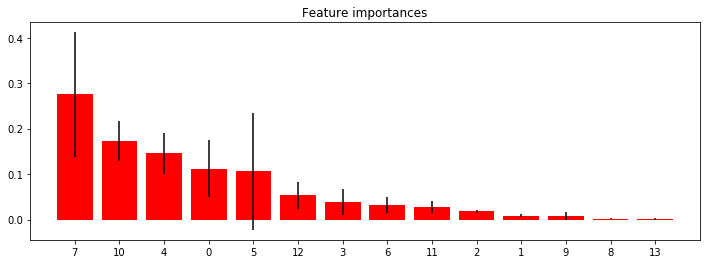

In [65]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importancesVar[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

- 7  - 'occupation'
- 10 - 'Gender'
- 4  - 'education'

- Response - Annual Income (predicting the annual income (binary class >50K/<=50k) based on census data)

In [67]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [74]:
# Test data response class distribution
y_test.value_counts()

0    6769
1    2280
Name: wage_class, dtype: int64

In [75]:
# calculate the Null Accuracy of class 0
y_test.value_counts().head(2)/ len(y_test)

0    0.748038
1    0.251962
Name: wage_class, dtype: float64

In [77]:
print(metrics.confusion_matrix(y_test, y_pred))

[[6442  327]
 [ 977 1303]]


- Basic terminology
    - True Positives (TP): correctly predicted that they do have diabetes
    - True Negatives (TN): correctly predicted that they don't have diabetes
    - False Positives (FP): incorrectly predicted that they do have diabetes (a "Type I error")
    - False Negatives (FN): incorrectly predicted that they don't have diabetes (a "Type II error")

In [78]:
# save confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("TN - ", TN)
print("FP - ", FP)
print("FN - ", FN)
print("TP - ", TP)

TN -  6442
FP -  327
FN -  977
TP -  1303


In [79]:
# Classification Accuracy : 

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.855895679081
0.855895679081


In [80]:
# Sensitivity(True positive Rate) : when the actual value is positive, how often the prediction correct 
# Sensitivity = TP / (TP + FN)

print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.57149122807
0.57149122807


In [81]:
# Precision: When a positive value is predicted, how often is the prediction correct
#    How precise is the classifier when predicting positive instances

print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.799386503067
0.799386503067
